In [1]:
import os
os.getcwd()

'C:\\Users\\Albert\\Desktop\\DATA SCIENCE\\UBIQUM\\UBIQUM_1X2_Python\\notebooks'

In [2]:
import pandas as pd

xl = pd.ExcelFile('../bbdd/FULL_BBDD_with_features.xlsx')
df = xl.parse(xl.sheet_names[0])

In [3]:
df.drop(df.columns[[i[0:4]=='ref_' for i in df.columns]], axis=1, inplace=True)
df.columns

Index(['TEMPORADA', 'LIGA', 'JORNADA', 'FECHA', 'LOCAL', 'VISITANTE', 'GOL L',
       'GOL V', 'ARBITRO', 'QUINIELA', 'last2_hometeam_w', 'last2_hometeam_d',
       'last2_hometeam_l', 'last5_hometeam_w', 'last5_hometeam_d',
       'last5_hometeam_l', 'last10_hometeam_w', 'last10_hometeam_d',
       'last10_hometeam_l', 'last2_awayteam_w', 'last2_awayteam_d',
       'last2_awayteam_l', 'last5_awayteam_w', 'last5_awayteam_d',
       'last5_awayteam_l', 'last10_awayteam_w', 'last10_awayteam_d',
       'last10_awayteam_l', 'league_local_local_w', 'league_local_local_d',
       'league_local_local_l', 'league_visitor_visitor_w',
       'league_visitor_visitor_d', 'league_visitor_visitor_l', 'h2h_last_10_h',
       'h2h_last_10_d', 'h2h_last_10_a', 'h2h_5_homeaway_h',
       'h2h_5_homeaway_d', 'h2h_5_homeaway_a'],
      dtype='object')

### Preparing models (create train and test, scaling, filtering information)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

Select what part of the dataframe i want to model and create the final dataframe

In [5]:
jornada_cut = 10
league_selec = 1
selec = df[(df['JORNADA']>=jornada_cut) & (df['LIGA'] == league_selec)]

In [6]:
quiniela = pd.get_dummies(selec.QUINIELA)
selec = pd.concat([selec, quiniela], axis=1)

Save variables from models

In [7]:
selec.columns

Index(['TEMPORADA', 'LIGA', 'JORNADA', 'FECHA', 'LOCAL', 'VISITANTE', 'GOL L',
       'GOL V', 'ARBITRO', 'QUINIELA', 'last2_hometeam_w', 'last2_hometeam_d',
       'last2_hometeam_l', 'last5_hometeam_w', 'last5_hometeam_d',
       'last5_hometeam_l', 'last10_hometeam_w', 'last10_hometeam_d',
       'last10_hometeam_l', 'last2_awayteam_w', 'last2_awayteam_d',
       'last2_awayteam_l', 'last5_awayteam_w', 'last5_awayteam_d',
       'last5_awayteam_l', 'last10_awayteam_w', 'last10_awayteam_d',
       'last10_awayteam_l', 'league_local_local_w', 'league_local_local_d',
       'league_local_local_l', 'league_visitor_visitor_w',
       'league_visitor_visitor_d', 'league_visitor_visitor_l', 'h2h_last_10_h',
       'h2h_last_10_d', 'h2h_last_10_a', 'h2h_5_homeaway_h',
       'h2h_5_homeaway_d', 'h2h_5_homeaway_a', '1', '2', 'X'],
      dtype='object')

In [9]:
import pickle
pickle.dump(selec.columns, open('../models/variables.sav', 'wb'))

### Logistic Regression for "1"

In [9]:
x_col = list(selec.columns[[((i[-2:] in ['_l', '_w', '_d', '_h','_a' ])) for i in list(selec.columns)]])
X = selec[x_col]
y = selec['1']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [11]:
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

clf_1 = LogisticRegression(solver='lbfgs')
clf_1.fit(X_train, y_train)
predslog_1 = clf_1.predict(X_test)
probslog_1 = clf_1.predict_proba(X_test)[:,1]
print('F1-Score:', round(f1_score(y_test, predslog_1),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predslog_1),4))

F1-Score: 0.5704 | Kappa: 0.2061


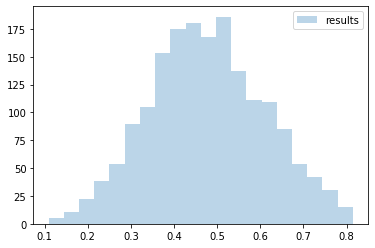

In [12]:
import matplotlib.pyplot as plt
lr = clf_1.predict_proba(X_test)[:,1]
plt.hist(lr, bins = 20, alpha = 0.3, label='results')
plt.legend()

Save model

In [26]:
import pickle
pickle.dump(clf_1, open('../models/model1.sav', 'wb'))

### Logistic Regression for "2"

In [13]:
x_col = list(selec.columns[[((i[-2:] in ['_l', '_w', '_d', '_h','_a' ])) for i in list(selec.columns)]])
X = selec[x_col]
y = selec['2']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [15]:
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_2.fit(X_train, y_train)
predslog_2 = clf_2.predict(X_test)
probslog_2 = clf_2.predict_proba(X_test)[:,1]
print('F1-Score:', round(f1_score(y_test, predslog_2),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predslog_2),4))

F1-Score: 0.1786 | Kappa: 0.1096


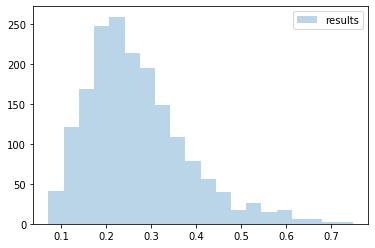

In [16]:
import matplotlib.pyplot as plt
lr = clf_2.predict_proba(X_test)[:,1]
plt.hist(lr, bins = 20, alpha = 0.3, label='results')
plt.legend()

Save model

In [25]:
import pickle
pickle.dump(clf_2, open('../models/model2.sav', 'wb'))

### Logistic Regression for "X"

In [17]:
x_col = list(selec.columns[[((i[-2:] in ['_l', '_w', '_d', '_h','_a' ])) for i in list(selec.columns)]])
X = selec[x_col]
y = selec['X']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [19]:
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

clf_x = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_x.fit(X_train, y_train)
predslog_X = clf_x.predict(X_test)
probslog_X = clf_x.predict_proba(X_test)[:,1]
print('F1-Score:', round(f1_score(y_test, predslog_X),4), "|", "Kappa:", round(cohen_kappa_score(y_test, predslog_X),4))

F1-Score: 0.0 | Kappa: 0.0


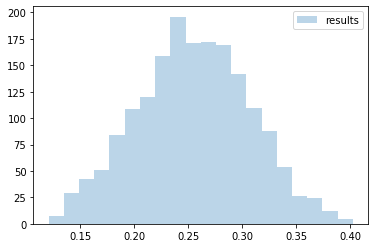

In [20]:
import matplotlib.pyplot as plt
lr = clf_x.predict_proba(X_test)[:,1]
plt.hist(lr, bins = 20, alpha = 0.3, label='results')
plt.legend()

Save model

In [27]:
import pickle
pickle.dump(clf_x, open('../models/modelx.sav', 'wb'))

In [28]:
pickle.dump(X_train.columns, open('../models/training.sav', 'wb'))

### Paste Probabilities for 1X2 in new DF

In [29]:
import pandas as pd 
import numpy as np
zip_probs = list(zip(probslog_1, probslog_X, probslog_2)) 
probs_1X2 = pd.DataFrame(zip_probs, columns = ['predslog_1', 'predslog_X', 'predslog_2']) 

In [30]:
probs_1X2['1'] = probs_1X2.apply(lambda x: x[0]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2['X'] = probs_1X2.apply(lambda x: x[1]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2['2'] = probs_1X2.apply(lambda x: x[2]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2.drop(["predslog_1", "predslog_X", "predslog_2"], axis=1, inplace=True)

In [31]:
probs_1X2.tail(10)

,1,X,2
1760,0.483963,0.284016,0.232021
1761,0.459995,0.242925,0.297079
1762,0.532310,0.249562,0.218128
1763,0.533920,0.271296,0.194784
1764,0.277062,0.242483,0.480456
1765,0.557102,0.232136,0.210762
1766,0.642759,0.164916,0.192325
1767,0.281463,0.223001,0.495536
1768,0.334733,0.326658,0.338609
1769,0.359102,0.363922,0.276976


### Probabilities for current Quiniela

In [32]:
import pandas as pd

xl = pd.ExcelFile('../bbdd/QUINIELA_2_FEATURES.xlsx')
quiniela = xl.parse(xl.sheet_names[0])

I create columns for each team since models include them.

In [33]:
dummy1 = pd.get_dummies(quiniela.LOCAL)
dummy2 = pd.get_dummies(quiniela.VISITANTE)
dummy2.columns = [i+"_2" for i in dummy2.columns]
quiniela = pd.concat([quiniela, dummy1, dummy2], axis=1)

Afterwards I detect and create columns with 0 values for teams not in Quiniela since they also will the in the model

In [34]:
add_col = [i for i in list(selec.columns) if i not in list(quiniela.columns)]
add_col = [i for i in add_col if i not in ['GOL L', 'GOL V', 'QUINIELA', 'ARBITRO', '1', 'X', '2']]

In [35]:
for i in add_col:
    quiniela[i] = 0

Calculate probabilities from the models

In [36]:
probslog_1 = clf_1.predict_proba(quiniela[X_train.columns])[:,1]
probslog_X = clf_x.predict_proba(quiniela[X_train.columns])[:,1]
probslog_2 = clf_2.predict_proba(quiniela[X_train.columns])[:,1]

In [48]:
probslog_1

array([0.55240136, 0.29025026, 0.60985919, 0.63882244, 0.41186289,
       0.41722117, 0.37836561, 0.5737982 , 0.28479706, 0.45434513,
       0.48914962, 0.51414921, 0.46497725, 0.44888607, 0.19522145])

In [42]:
extreme=1

In [43]:
import pandas as pd 
import numpy as np
zip_probs = list(zip(probslog_1**extreme, probslog_X**extreme, probslog_2**extreme, quiniela.LOCAL, quiniela.VISITANTE)) 
probs_1X2 = pd.DataFrame(zip_probs, columns = ['predslog_1', 'predslog_X', 'predslog_2', 'LOCAL', 'VISITANTE']) 

Rescale to sum 1

In [44]:
probs_1X2['1'] = probs_1X2.apply(lambda x: x[0]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2['X'] = probs_1X2.apply(lambda x: x[1]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2['2'] = probs_1X2.apply(lambda x: x[2]/(x[0]+x[1]+x[2]), axis=1)
probs_1X2.drop(["predslog_1", "predslog_X", "predslog_2"], axis=1, inplace=True)

In [45]:
print(sum(probs_1X2['1'][0:13]))
print(sum(probs_1X2['X'][0:13]))
print(sum(probs_1X2['2'][0:13]))

6.108918724535959
3.4937063284665397
3.3973749469975023


In [46]:
print(probs_1X2[['1','X','2']])

           1         X         2
0   0.554685  0.258304  0.187010
1   0.287040  0.217688  0.495272
2   0.609360  0.238755  0.151885
3   0.621991  0.242567  0.135442
4   0.423239  0.258636  0.318125
5   0.421720  0.324206  0.254073
6   0.381521  0.308471  0.310008
7   0.577792  0.212253  0.209955
8   0.282004  0.321548  0.396447
9   0.462720  0.269096  0.268184
10  0.498167  0.264083  0.237750
11  0.515930  0.281324  0.202746
12  0.472748  0.296775  0.230477
13  0.448367  0.306702  0.244931
14  0.182489  0.326804  0.490708


In [117]:
probs_1X2.to_excel("../bbdd/QUINIELA_3_PROBS.xlsx", index=False)